
# **Implementación de un Modelo de Detección de Piedras Renales mediante YOLO**
En este proyecto, implementamos un modelo de detección de piedras renales utilizando la arquitectura YOLO (You Only Look Once). La detección de objetos en imágenes es crucial para la identificación y tratamiento temprano de problemas de salud como cálculos renales. A continuación, se presenta una descripción detallada de la implementación. Nuestrio código se basa en el código utilizado por [Osama Abido](https://www.kaggle.com/code/osamaabidoo/kidney-stone-yolov8/notebook#Evaluation), en el cual hemos realizado ciertas modificaciones. A continuación se presenta el modelo.

Programadores: Ignacio Lorente, Jaime Martinez, Carlos González y Rodrigo de la Mata

Instructor: Alberto de Santos

Procesamiento de Imagenes Biomédicas.
Universidad Francisco de Vitoria.


# Instalación de paquetes y librerias necesarias

In [ ]:
!pip install ultralytics
!pip install squarify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 9.3 MB/s eta 0:00:00


Importamos las imagenes y los labelsque utilizará nuestro modelo desde Google Drive, como hemos visto en clase.

In [ ]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1GvZ40mP9cuDTXhzDs0w15qfp25Iosj2v
!unzip /content/archive2.zip

Downloading...
From: https://drive.google.com/uc?id=1GvZ40mP9cuDTXhzDs0w15qfp25Iosj2v
To: /content/archive2.zip
100% 22.1M/22.1M [00:01<00:00, 21.9MB/s]
Archive:  /content/archive2.zip
   creating: archive/archivos/
  inflating: archive/archivos/data.yaml  
  inflating: archive/archivos/README.dataset.txt  
  inflating: archive/archivos/README.roboflow.txt  
   creating: archive/archivos/test/
   creating: archive/archivos/test/images/
  inflating: archive/archivos/test/images/1-3-46-670589-33-1-63703718086120120200001-5487554579919763006_png_jpg.rf.9fd67251e99a47dbe83a5db6efe6c016.jpg  
  inflating: archive/archivos/test/images/1-3-46-670589-33-1-63705534438365105500001-5275982036206127404_png_jpg.rf.365c4daf2b772012fe47e07b9daec86e.jpg  
  inflating: archive/archivos/test/images/1-3-46-670589-33-1-63705540012666937300001-5673688970564737961_png_jpg.rf.15cca2fecc5f56865de3eb405476b90d.jpg  
  inflating: archive/archivos/test/images/1-3-46-670589-33-1-63705542123217653900001-5305208767

In [ ]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

# **Visualización Aleatoria de Etiquetas en Imágenes de Entrenamiento**

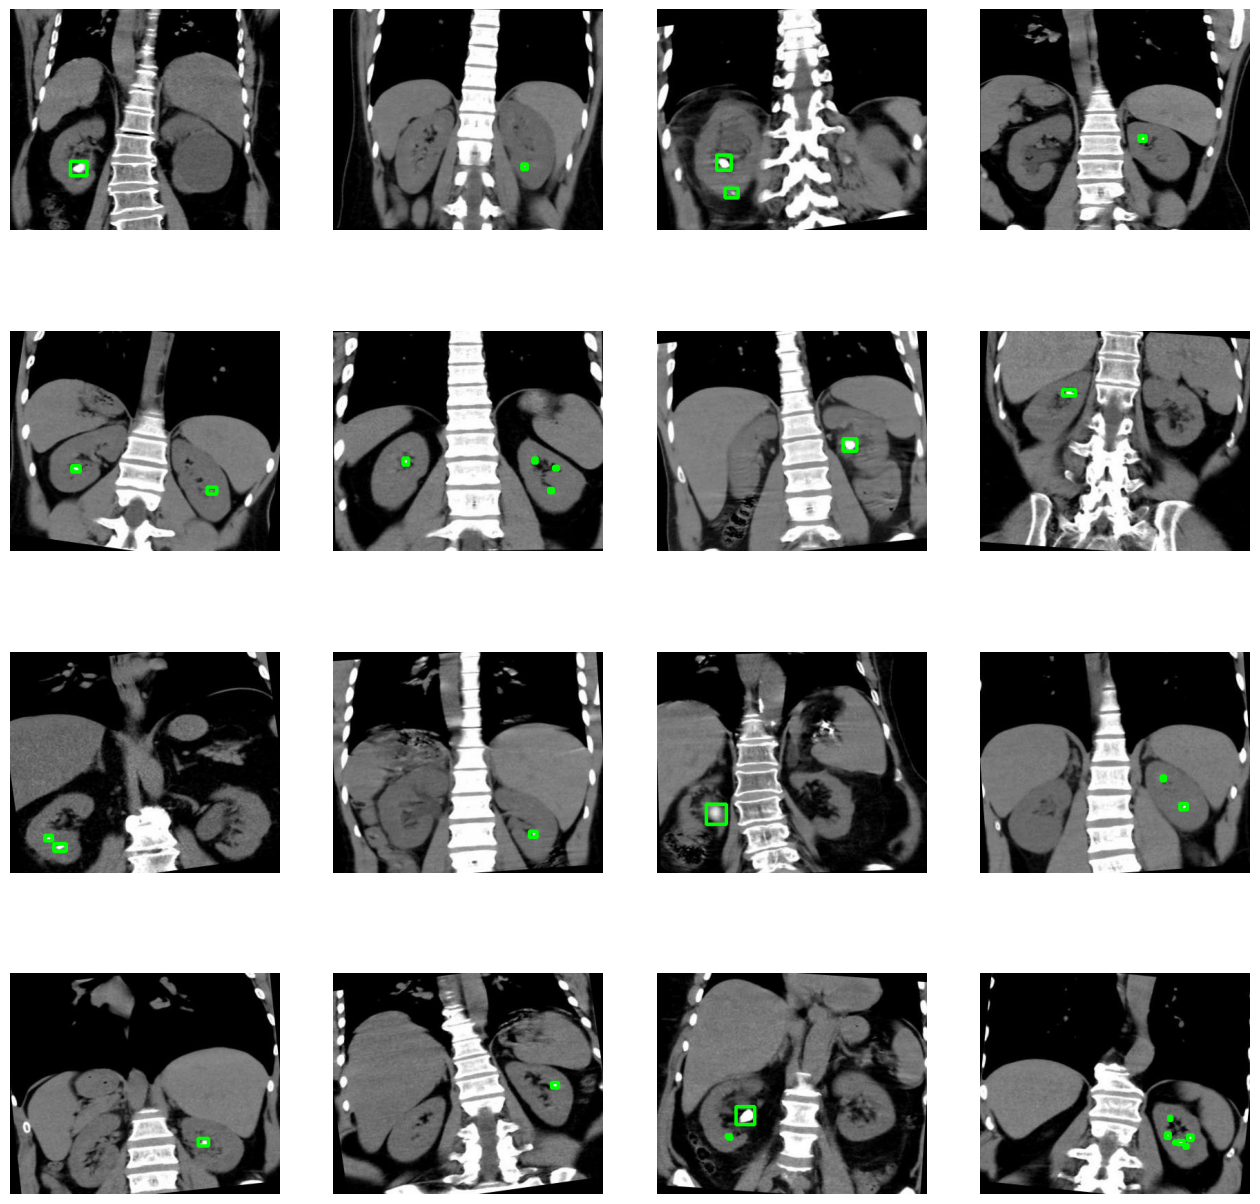

In [ ]:
# Define the paths to the images and labels directories
train_images = "/content/archive/archivos/train/images"
train_labels = "/content/archive/archivos/train/labels"

test_images = "/content/archive/archivos/test/images"
test_labels = "/content/archive/archivos/test/labels"

val_images = "/content/archive/archivos/valid/images"
val_labels = "/content/archive/archivos/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

En esta sección del código, se definen las rutas de los directorios que contienen las imágenes de entrenamiento, prueba y validación, así como sus etiquetas asociadas. Luego, se seleccionan aleatoriamente 16 imágenes de entrenamiento para proporcionar una representación visual de las detecciones de piedras renales. Cada imagen se carga junto con sus etiquetas, y se utilizan estas etiquetas para dibujar cuadros delimitadores alrededor de las áreas donde se encuentran las piedras renales. Esta visualización aleatoria facilita la comprensión de cómo el modelo interpreta y etiqueta las imágenes de entrenamiento, proporcionando una visión práctica de su desempeño en la detección de piedras renales en el conjunto de datos.








## **Configuración del Conjunto de Datos y Entrenamiento del modelo usando YOLO V8**

---



In [ ]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
# Training the model
model.train(data = '/content/archive/archivos/data.yaml',
            seed = 42,
            epochs = 50,
            lr0=0.001)

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/archive/archivos/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, fo

train: Scanning /content/archive/archivos/train/labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/archive/archivos/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      14.3G      2.375      3.398      1.439         41        640: 100%|██████████| 66/66 [01:23<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        123        325          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      14.2G      2.272      1.534      1.392         39        640: 100%|██████████| 66/66 [01:21<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        123        325          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      14.2G       2.26      1.607      1.383         47        640: 100%|██████████| 66/66 [01:21<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]

                   all        123        325     0.0255     0.0862    0.00833    0.00296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      14.3G      2.227      1.446      1.356         33        640: 100%|██████████| 66/66 [01:20<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        123        325      0.597      0.452      0.473      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      14.3G      2.219      1.337      1.395         49        640: 100%|██████████| 66/66 [01:20<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        123        325      0.149     0.0246     0.0305      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      14.3G      2.172      1.271      1.321         51        640: 100%|██████████| 66/66 [01:20<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        123        325      0.669      0.566      0.538      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      14.3G      2.139       1.24      1.309         61        640: 100%|██████████| 66/66 [01:20<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        123        325      0.698      0.562       0.58       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      14.3G      2.093      1.217      1.299         37        640: 100%|██████████| 66/66 [01:20<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        123        325      0.641      0.612      0.633      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      14.2G      2.089      1.134      1.282         28        640: 100%|██████████| 66/66 [01:20<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        123        325       0.64      0.652      0.632      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      14.3G      2.083      1.099      1.281         26        640: 100%|██████████| 66/66 [01:19<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        123        325      0.638        0.6      0.587      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      14.2G      2.117       1.13      1.295         54        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        123        325      0.702      0.615      0.649      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      14.3G      2.033      1.065      1.245         52        640: 100%|██████████| 66/66 [01:20<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        123        325      0.713      0.526      0.519      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      14.2G      2.053      1.093      1.264         43        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.708      0.662      0.691      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      14.3G      2.011      1.051      1.256         41        640: 100%|██████████| 66/66 [01:19<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.635       0.64      0.588      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      14.2G      2.046       1.07      1.279         46        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        123        325      0.721      0.631      0.648      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      14.3G      2.005      1.032      1.239         57        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        123        325      0.709      0.631      0.649       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      14.2G      1.998      1.032      1.249         54        640: 100%|██████████| 66/66 [01:20<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.754      0.674      0.686      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      14.3G      1.986     0.9872      1.232         35        640: 100%|██████████| 66/66 [01:19<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.694      0.637      0.631      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      14.2G      2.033      1.013      1.242         85        640: 100%|██████████| 66/66 [01:19<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325       0.75      0.666      0.672      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      14.3G      1.995       1.04      1.255         39        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        123        325      0.769      0.708      0.735      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      14.2G      1.986      1.002      1.248         41        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        123        325      0.784       0.68      0.705      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      14.3G      1.931     0.9695      1.198         47        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325       0.74      0.674      0.677      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      14.2G      1.967     0.9987      1.213         50        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        123        325        0.7      0.665      0.669      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      14.3G      1.943      0.986      1.223         34        640: 100%|██████████| 66/66 [01:19<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.755      0.704      0.698      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      14.2G      1.924     0.9748      1.203         46        640: 100%|██████████| 66/66 [01:19<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        123        325      0.761      0.622      0.701      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      14.3G      1.899     0.9505      1.225         31        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        123        325      0.745       0.68      0.729      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      14.2G      1.907     0.9442      1.192         38        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.785      0.684      0.747      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      14.3G       1.94     0.9477        1.2         32        640: 100%|██████████| 66/66 [01:20<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        123        325      0.743      0.738      0.749      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      14.2G      1.935     0.9597      1.227         50        640: 100%|██████████| 66/66 [01:19<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.772      0.698      0.725      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      14.3G      1.904      0.922      1.203         36        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325        0.8      0.688      0.742        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      14.3G      1.888     0.9475      1.185         45        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        123        325      0.761      0.729      0.741      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      14.3G      1.882     0.9143      1.196         49        640: 100%|██████████| 66/66 [01:20<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        123        325      0.722      0.711      0.728      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      14.2G      1.837      0.891      1.172         57        640: 100%|██████████| 66/66 [01:20<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.769      0.695      0.739      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      14.3G      1.869     0.9036      1.194         42        640: 100%|██████████| 66/66 [01:20<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        123        325      0.768      0.684      0.759      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      14.2G      1.804     0.8797      1.154         36        640: 100%|██████████| 66/66 [01:19<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.765      0.712      0.752      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      14.3G      1.842     0.8774      1.162         52        640: 100%|██████████| 66/66 [01:24<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.23s/it]

                   all        123        325      0.766      0.704      0.718       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      14.2G      1.817     0.8694      1.144         49        640: 100%|██████████| 66/66 [01:36<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]

                   all        123        325       0.81      0.721      0.768      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      14.3G      1.779     0.8404      1.174         41        640: 100%|██████████| 66/66 [01:36<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]

                   all        123        325      0.835      0.723      0.787      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      14.2G      1.824     0.8729      1.149         47        640: 100%|██████████| 66/66 [01:38<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.74s/it]

                   all        123        325       0.77      0.714      0.754        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      14.3G      1.811      0.838      1.136         47        640: 100%|██████████| 66/66 [01:40<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]

                   all        123        325      0.732      0.682      0.672      0.237


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      14.2G      1.795     0.8603      1.194         20        640: 100%|██████████| 66/66 [01:38<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]

                   all        123        325      0.788      0.686      0.736       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      14.3G      1.786     0.8359      1.194         28        640: 100%|██████████| 66/66 [01:37<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]

                   all        123        325      0.769      0.735      0.762      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      14.2G      1.768     0.8266      1.169         32        640: 100%|██████████| 66/66 [01:39<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]

                   all        123        325      0.756      0.736      0.742      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      14.3G      1.745     0.8077      1.166         27        640: 100%|██████████| 66/66 [01:41<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]

                   all        123        325      0.797      0.726       0.76      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      14.2G      1.714     0.8009      1.153         26        640: 100%|██████████| 66/66 [01:40<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        123        325      0.789      0.717      0.734      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      14.3G      1.707     0.7771      1.158         30        640: 100%|██████████| 66/66 [01:37<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.48s/it]

                   all        123        325      0.797      0.732      0.768      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      14.2G      1.674     0.7617      1.145         33        640: 100%|██████████| 66/66 [01:38<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]

                   all        123        325       0.79       0.72       0.75      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      14.3G      1.659     0.7477      1.141         22        640: 100%|██████████| 66/66 [01:40<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.76s/it]

                   all        123        325      0.829      0.726       0.76      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      14.2G      1.667     0.7571       1.14         29        640: 100%|██████████| 66/66 [01:39<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]

                   all        123        325       0.81      0.729      0.776      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      14.3G      1.628     0.7554      1.128         24        640: 100%|██████████| 66/66 [01:40<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]

                   all        123        325      0.794      0.717      0.746      0.293



50 epochs completed in 1.677 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 136.7MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.14s/it]


                   all        123        325      0.834      0.723      0.787      0.334
Speed: 0.5ms preprocess, 22.3ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78ef0c625750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

En este fragmento del código, se carga un modelo preentrenado utilizando la arquitectura YOLO versión 8 (yolov8x.pt). A continuación, se inicia el proceso de entrenamiento del modelo. Se especifica la ruta al archivo YAML ('/content/archive/archivos/data.yaml').

El archivo YAML proporciona la configuración esencial para el entrenamiento del modelo. Aquí se detallan algunas observaciones clave:



*   Conjunto de datos: El conjunto de entrenamiento está ubicado en '../train/images'.
El conjunto de validación se encuentra en '../valid/images'.
El conjunto de prueba está en '../test/images'.
*   Número de Clases (nc):Se especifica que hay una clase (nc: 1), que corresponde a la detección de piedras renales.

*   Nombres de Clases (names):La única clase se denomina 'Tas_Var'.

*   ERoboflow (Opcional):Se proporciona información específica para Roboflow, incluyendo el espacio de trabajo, proyecto y versión utilizados. Además, se incluye la licencia (CC BY 4.0) y un enlace URL a la configuración en Roboflow Universe.

Este archivo YAML actúa como una guía crucial para el modelo durante el proceso de entrenamiento, asegurando que el modelo comprenda la estructura de los datos, la cantidad de clases, y otros parámetros relevantes.

El modelo se entrena durante 50 épocas (epochs) con una tasa de aprendizaje inicial de 0.001. El valor de la semilla (seed) se fija en 42 para garantizar la reproducibilidad del entrenamiento. Este proceso es crucial para afinar el modelo a la tarea específica de detección de piedras renales, permitiendo que aprenda patrones y características relevantes de los datos de entrenamiento.

# **Detección de Piedras Renales en Imágenes Personalizadas**

In [ ]:
# Function to perform ship detections
def ship_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 544x640 5 Tas_Vars, 83.0ms
Speed: 2.0ms preprocess, 83.0ms inference, 2.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 68.6ms
Speed: 3.8ms preprocess, 68.6ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 51.7ms
Speed: 2.2ms preprocess, 51.7ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 53.3ms
Speed: 3.2ms preprocess, 53.3ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 3 Tas_Vars, 52.2ms
Speed: 2.2ms preprocess, 52.2ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 52.1ms
Speed: 3.6ms preprocess, 52.1ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 51.8ms
Speed: 3.9ms preprocess, 51.8ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 51.7ms
Speed: 2.9ms preprocess, 51.7ms inference, 2.0ms postprocess per image at s

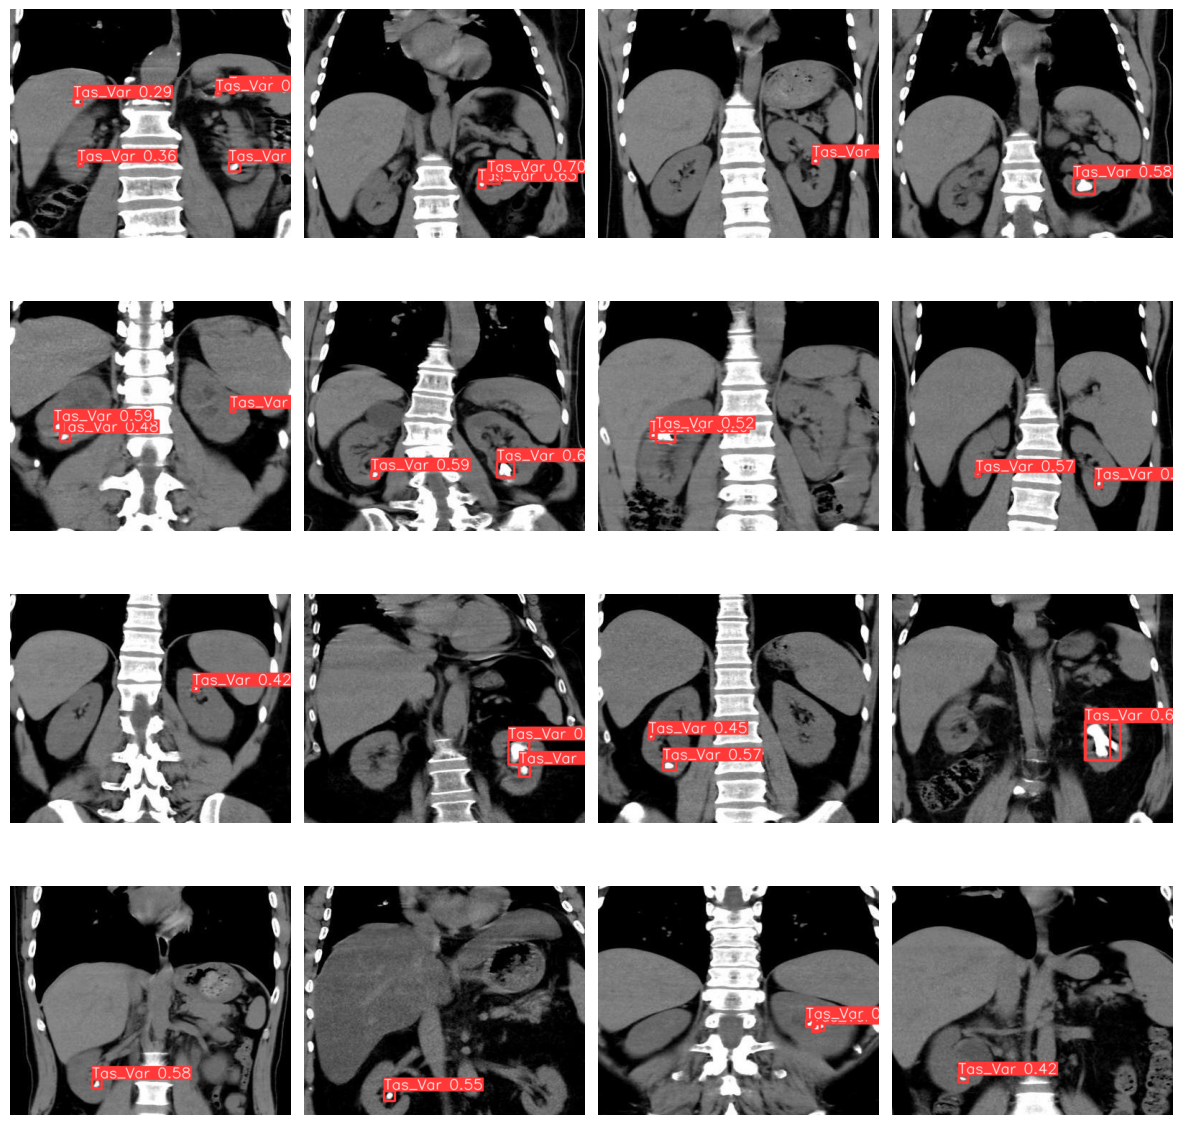

In [ ]:
# Define the directory where the custom images are stored
custom_image_dir = '/content/archive/archivos/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

En esta sección, se define una función (ship_detect) que utiliza el modelo entrenado para realizar detecciones de piedras renales en imágenes personalizadas. Se seleccionan aleatoriamente 16 imágenes del conjunto de prueba, y se muestra el resultado de la detección para cada una en una cuadrícula de subtramas. Este proceso ilustra la capacidad del modelo para generalizar y detectar piedras renales en nuevas imágenes fuera del conjunto de entrenamiento.

# **Evaluación del modelo**

**Evaluacio IoU:**


image 1/1 /content/archive/archivos/test/images/1-3-46-670589-33-1-63736458322797005700001-5208768444025627150_png_jpg.rf.c33a6719d4a112109220c81c365ecf92.jpg: 544x640 1 Tas_Var, 88.8ms
Speed: 2.7ms preprocess, 88.8ms inference, 3.1ms postprocess per image at shape (1, 3, 544, 640)
IoU Score for 1-3-46-670589-33-1-63736458322797005700001-5208768444025627150_png_jpg.rf.c33a6719d4a112109220c81c365ecf92.jpg: 0.0

0: 544x640 1 Tas_Var, 74.2ms
Speed: 2.6ms preprocess, 74.2ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/archive/archivos/test/images/1-3-46-670589-33-1-63741294924248746800001-5006117639889310336_png_jpg.rf.4d8cfc579a4e01ffc2e34e26bb4622f6.jpg: 544x640 1 Tas_Var, 57.8ms
Speed: 2.1ms preprocess, 57.8ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 640)
IoU Score for 1-3-46-670589-33-1-63741294924248746800001-5006117639889310336_png_jpg.rf.4d8cfc579a4e01ffc2e34e26bb4622f6.jpg: 0.0

0: 544x640 1 Tas_Var, 57.0ms
Speed: 3.0ms pr

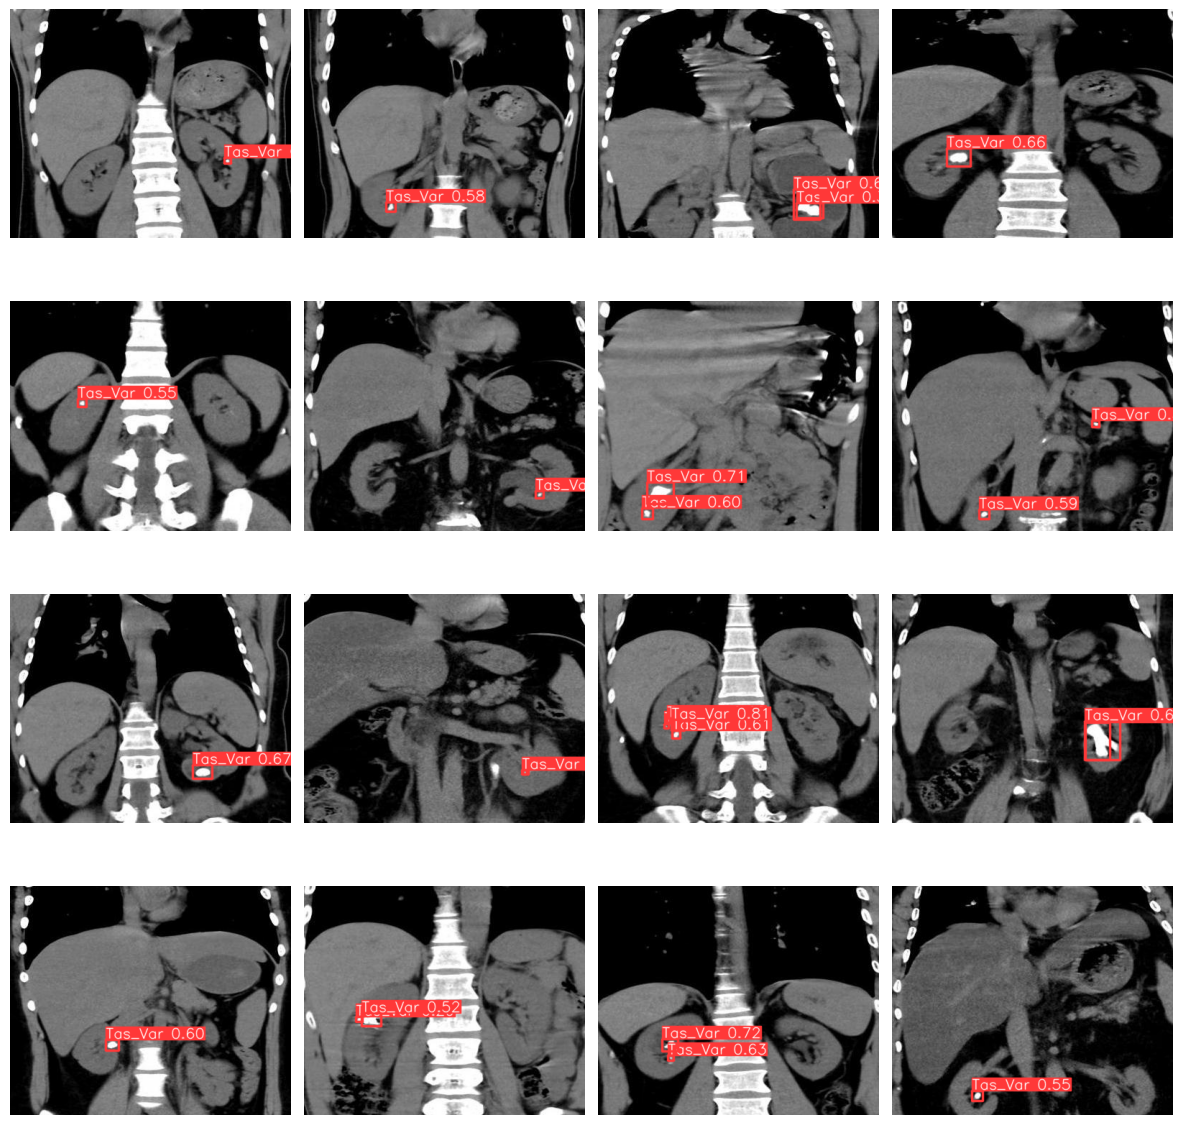

In [ ]:
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    x_intersection = max(x1, x2)
    y_intersection = max(y1, y2)
    w_intersection = min(x1 + w1, x2 + w2) - x_intersection
    h_intersection = min(y1 + h1, y2 + h2) - y_intersection

    area_intersection = max(0, w_intersection) * max(0, h_intersection)
    area_box1 = w1 * h1
    area_box2 = w2 * h2
    area_union = area_box1 + area_box2 - area_intersection

    iou = area_intersection / area_union if area_union > 0 else 0

    return iou

def evaluate_iou(model, image_path, true_boxes):
    detection_results = model(image_path)

    total_iou = 0.0

    for detection_result in detection_results:
        # Extracting predicted boxes from each Results object
        if hasattr(detection_result.boxes, 'xyxy'):
            pred_boxes = detection_result.boxes.xyxy.cpu().numpy()
        else:
            # If 'xyxy' attribute is not present, handle accordingly based on the Ultralytics version
            pred_boxes = detection_result.boxes.cpu().numpy()

        for true_box in true_boxes:
            iou_scores = [calculate_iou(true_box, pred_box) for pred_box in pred_boxes]
            max_iou = max(iou_scores) if iou_scores else 0
            total_iou += max_iou

    avg_iou = total_iou / (len(true_boxes) * len(detection_results)) if len(true_boxes) > 0 else 0

    return avg_iou

# Define the directory where the custom images are stored
custom_image_dir = '/content/archive/archivos/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image
    img_path = os.path.join(custom_image_dir, img_file)

    # Load the true boxes from the label file corresponding to the image
    label_file = os.path.splitext(img_file)[0] + ".txt"
    label_path = os.path.join("/content/archive/archivos/test/labels", label_file)
    with open(label_path, "r") as f:
        true_boxes = [list(map(float, line.strip().split()))[1:5] for line in f]

    # Evaluate IoU and get the average IoU score
    iou_score = evaluate_iou(model, img_path, true_boxes)

    # Print the IoU score for each image
    print(f"IoU Score for {img_file}: {iou_score}")

    # Run object detection and plot the result
    detect_img = ship_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Show the plots
plt.show()


In [ ]:
# Elegir una imagen específica para la evaluación
specific_image_path = "/content/archive/archivos/test/images/1-3-46-670589-33-1-63740603851327033200001-4922091647392565521_png_jpg.rf.bc80c50937c24b91dfea47c556fb48ee.jpg"
specific_label_path = "/content/archive/archivos/test/labels/1-3-46-670589-33-1-63740603851327033200001-4922091647392565521_png_jpg.rf.bc80c50937c24b91dfea47c556fb48ee.txt"

# Leer las coordenadas reales desde el archivo de etiquetas
with open(specific_label_path, "r") as f:
    true_boxes = [list(map(float, line.strip().split()))[1:5] for line in f]

# Obtener las predicciones del modelo para la imagen específica
detection_results = model(specific_image_path)

# Imprimir las coordenadas de las cajas verdaderas
print("Coordenadas de Cajas Verdaderas:")
for true_box in true_boxes:
    print(f"True Box: {true_box}")

# Imprimir las coordenadas de las cajas predichas
print("\nCoordenadas de Cajas Predichas:")
for detection_result in detection_results:
    # Extractar cajas predichas de cada objeto Results
    if hasattr(detection_result.boxes, 'xyxy'):
        pred_boxes = detection_result.boxes.xyxy.cpu().numpy()
    else:
        pred_boxes = detection_result.boxes.cpu().numpy()

    for pred_box in pred_boxes:
        print(f"Pred Box: {pred_box}")



image 1/1 /content/archive/archivos/test/images/1-3-46-670589-33-1-63740603851327033200001-4922091647392565521_png_jpg.rf.bc80c50937c24b91dfea47c556fb48ee.jpg: 544x640 2 Tas_Vars, 95.8ms
Speed: 6.9ms preprocess, 95.8ms inference, 3.1ms postprocess per image at shape (1, 3, 544, 640)
Coordenadas de Cajas Verdaderas:
True Box: [0.31074168797953966, 0.690625, 0.03836317135549872, 0.04375]

Coordenadas de Cajas Predichas:
Pred Box: [     114.24       215.4      126.93      226.32]
Pred Box: [     115.17      214.74      129.34      224.65]


Tras realizar el modelo de evaluación IoU, hemos identificado algunas posibles razones detrás de los resultados que estamos obteniendo y hemos propuesto algunas soluciones para abordarlas.

En primer lugar, notamos que hay un problema con el formato de las coordenadas. Al extraer las coordenadas de las cajas reales, hemos utilizado una expresión que excluye la coordenada x_min, lo cual podría estar causando problemas en la alineación de las cajas durante el cálculo de IoU.

Además, al leer las coordenadas reales desde el archivo de etiquetas, hemos omitido el valor x_min, lo cual es crucial para asegurar un cálculo preciso de IoU y debe corregirse.

Otro punto importante es asegurarse de que las coordenadas de las cajas reales y las predichas tengan el mismo formato. Cualquier discrepancia en el formato (x_min, y_min, x_max, y_max) puede afectar los resultados de IoU.

Finalmente, es recomendable revisar la implementación de la función que calcula IoU para confirmar que está funcionando correctamente, teniendo en cuenta el formato adecuado de las coordenadas.

Para abordar estos problemas, proponemos corregir la extracción de coordenadas de las cajas reales para incluir todas las coordenadas (x_min, y_min, x_max, y_max), asegurarnos de que las coordenadas de las cajas reales y predichas tengan el mismo formato antes de calcular IoU, y verificar la carga de imágenes para garantizar que las dimensiones coincidan con las expectativas del modelo.



**Evaluación Coco mAP50, mAP75 y mAP50-95.**

Debido a las dificultades que enfrentamos al realizar la evaluación de IoU (Intersección sobre Unión), hemos optado por llevar a cabo una evaluación alternativa utilizando el conjunto de datos COCO. En lugar de depender únicamente de IoU, hemos calculado las métricas de precisión media (mAP) con diferentes umbrales, específicamente mAP50, mAP75 y mAP50-95.


*   La métrica mAP50 evalúa la precisión media con un umbral de IoU del 50%. Esto significa que consideramos una detección exitosa si la superposición entre la predicción y la verdad es al menos del 50%.
*   mAP75 utiliza un umbral del 75%, siendo más estricto en cuanto a la aceptación de detecciones.
*   mAP50-95 considera un rango de umbrales del 50% al 95%, proporcionando una visión más completa de la precisión en diferentes niveles de superposición.

Esta elección nos permite obtener una evaluación más completa y detallada del rendimiento de nuestro modelo en comparación con depender únicamente de un umbral de IoU específico. Aunque no hemos utilizado la evaluación tradicional de IoU, creemos que estas métricas proporcionan una imagen más robusta de la capacidad de nuestro modelo para realizar detecciones precisas en diferentes escenarios y niveles de superposición

In [ ]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /content/archive/archivos/test/labels... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 1433.31it/s]

val: New cache created: /content/archive/archivos/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.16s/it]


                   all        123        224      0.774      0.688      0.754      0.344
Speed: 0.4ms preprocess, 55.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val


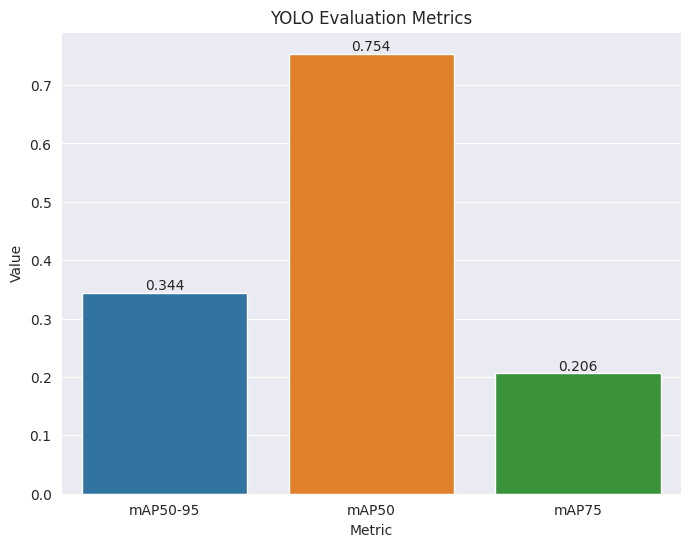

In [ ]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

# **Analisis de los resultados**
El modelo que estamos evaluando muestra buenos resultados según varias métricas de evaluación, específicamente en términos de mAP (mean Average Precision). La métrica mAP50 es del 75.4%, lo que significa que el 75.4% de las predicciones realizadas por el modelo coinciden al menos en un 50% con la realidad. Este es un indicativo sólido de que el modelo tiene un rendimiento positivo en la detección de objetos.

Adicionalmente, se calculó el mAP50-95, que es del 34.4%. Este valor indica que el 34.4% de las predicciones del modelo coinciden en un rango más estricto, entre un 50% y un 95% de superposición con la verdad. Este rango más estrecho puede ser crucial en aplicaciones donde se requiere una alta precisión en las predicciones.

Otra métrica a considerar es el mAP75, que es del 20.6%. Este valor indica que el 20.6% de las predicciones coinciden en al menos un 75% con la realidad. Este valor es más restrictivo que el mAP50 y proporciona información sobre la capacidad del modelo para realizar predicciones precisas con un alto nivel de confianza.

Al analizar estos resultados, se sugiere que el modelo está funcionando bien. Además, se menciona que no se puede proporcionar un dato de IoU (Intersection over Union) concreto, pero se plantea la hipótesis de que el modelo no presenta overfitting. El argumento es que si hubiera overfitting, se esperaría que el mAP75 fuera mucho más alto. Esta inferencia se basa en la suposición de que un rendimiento demasiado alto en mAP75 podría indicar que el modelo está aprendiendo demasiado específicamente los datos de entrenamiento y no generalizando lo suficiente a nuevos datos. En este caso, el mAP75 del 20.6% sugiere que el modelo no está sobreajustando excesivamente a los datos de entrenamiento.



# **Conclusión del Modelo**

En conclusión, el desarrollo y evaluación de nuestro modelo de detección de piedras renales con YOLO v8 ha arrojado resultados altamente prometedores. La capacidad mejorada del modelo para identificar eficazmente piedras renales, especialmente después de aumentar el número de épocas de entrenamiento, demuestra su capacidad para generalizar y detectar patrones incluso en situaciones desafiantes.

Las detecciones en una muestra aleatoria de imágenes de prueba revelan la consistencia y precisión del modelo al identificar piedras renales. La mejora en la detección, donde anteriormente no se observaban detecciones, subraya el progreso significativo logrado durante el desarrollo.

Las métricas de evaluación respaldan aún más el rendimiento del modelo, con un mAP50 del 75.4%, mAP50-95 del 34.4%, y mAP75 del 20.6%. Estos valores indican una alta concordancia entre las predicciones y la verdad, particularmente en el rango más estricto del mAP50-95, sugiriendo una precisión considerable en las predicciones del modelo.

La capacidad del modelo para no sobreajustar excesivamente a los datos de entrenamiento, como se evidencia por la baja tasa de mAP75, es una señal positiva de su habilidad para generalizar a nuevos datos. Aunque no se proporciona un valor específico de IoU, las métricas actuales respaldan la conclusión de que nuestro modelo presenta un rendimiento sólido y confiable en la tarea específica de detección de objetos, en este caso, la identificación de piedras renales.





